# Memorization baseline coarse-grained experiments analysis

In [1]:
from collections import defaultdict
import os

from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%matplotlib inline

In [2]:
client = MongoClient(os.environ['SACRED_MONGO_URL'])
db = client[os.environ['SACRED_DB_NAME']]

In [4]:
data = defaultdict(list)
for run in db.runs.find({'experiment.name': 'id-pos-tagging-memo-coarse'}):
    data['run_id'].append(run['_id'])
    data['window'].append(run['config']['window'])
    for which in ('train', 'dev'):
        metric_name = f'final_f1({which})'
        metric = db.metrics.find_one({'run_id': run['_id'], 'name': metric_name})
        if metric is not None:
            if len(metric['values']) != 1:
                print(f"run {run['_id']} metric {metric_name} has length != 1, taking the last one")
            data[metric_name].append(metric['values'][-1])

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,final_f1(dev),final_f1(train),run_id,window
0,0.215080,0.999506,285,3
1,0.296367,0.998942,286,2
2,0.296367,0.998942,287,2
3,0.296367,0.998942,288,2
4,0.296367,0.998942,289,2


## Analyzing multinomial variables

### window

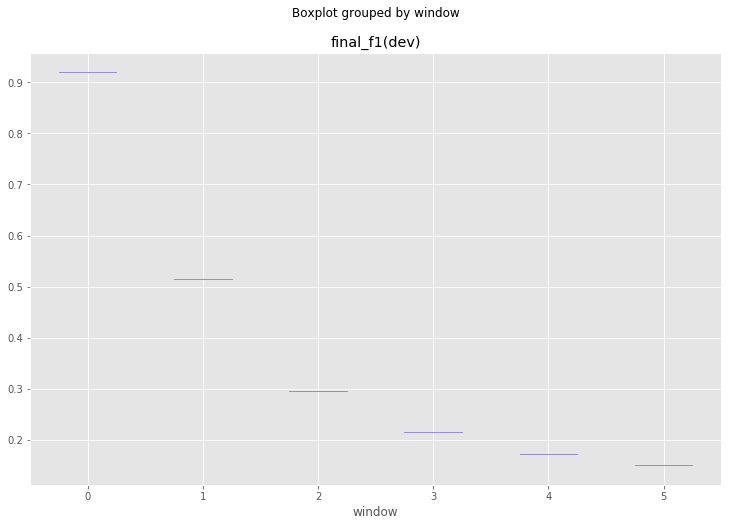

In [7]:
df.boxplot(column='final_f1(dev)', by='window', figsize=(12, 8))

There's no competition here, `window=0` clearly outperforms the others. No need for fine-grained experiments then.